constants imports etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy


DIFFUSIVITY = 0.6 # Diffusivity, may want to check the vaidity of this paticular number
r_0 = 1.2 # In fm, may want to chose a better value for small nuclei
A_C = 10 # The number of nucleons in the core
TOT_ANG_MOMENTUM = 0.5 # Total angular momentum
ORB_ANG_MOMENTUM = 0 # Orbital angular momentum

BETA_1 = 0.05
BETA_2 = 0.075
BETA_3 = 0.1
BETA_4 = 0.125
BETA_5 = 0.15 # All in [fm]^-2, and are all initial guesses
BETA_INITIAL_GUESSES = [BETA_1, BETA_2, BETA_3, BETA_4, BETA_5]
INITAL_C_GUESS = 0.01
V_LS = 21.0

r, a, j, l, R0, V0, Vls = sympy.symbols('r a j l R0 V0 Vls')

In [2]:
def five_gaussian_potential(r, c_1, beta_1, c_2, beta_2, c_3, beta_3, c_4, beta_4, c_5, beta_5, orb_ang_moment=ORB_ANG_MOMENTUM):
    """
    Defines our gaussian potential as a sum of 5 different potentials of the form V_0 e^(beta*r^2), for a set
    of beta.
    Input
    r : 1D array
    """
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    return - (V_0) * (c_1 * np.exp(-beta_1 * r**2) + c_2 * np.exp(-beta_2 * r**2) + c_3 * np.exp(
        -beta_3 * r**2) + c_4 * np.exp(-beta_4 * r**2) + c_5 * np.exp(-beta_5 * r**2))

In [3]:
r_values = np.linspace(0.000000000001, 12, 1000)

In [4]:
def finding_full_woods_saxon_potential(r, a=DIFFUSIVITY, Vls = -21, R = r_0, j=0.5, l=0):
    V_0 = -11.39 * (-1)**l - 51.13 # Defines V_0 for odd and even l states
    
    woods_saxon_function = 1 / (1 + np.exp(((r - R) / a)))
    woods_saxon_derivative = (np.exp((r-R)/a)) / (a*(1+np.exp((r-R)/a))**2)

    woods_saxon_term = V_0 * woods_saxon_function
    l_dot_s = (( j * (j + 1)) - (l * (l + 1))- (3 / 4)) / 2
    spin_orbit_term = Vls * l_dot_s * (1 / r) * woods_saxon_derivative

    return woods_saxon_term + spin_orbit_term

print(finding_full_woods_saxon_potential(1))

-36.42228930802392


In [5]:
#build geometric beta sequence
NUMBER_OF_GAUSSIANS = 5
ratio = 2
beta_1 = BETA_INITIAL_GUESSES[0]
betas = beta_1 * ratio ** np.arange(NUMBER_OF_GAUSSIANS)

In [6]:
#design matrix A
V0 = np.abs(-11.39 * (-1)**ORB_ANG_MOMENTUM - 51.13)

A = V0 * np.exp(-(r_values[:, None]**2) * betas[None, :])
print(A)

#vector b
R0 = r_0 * (A_C ** (1/3))
b = finding_full_woods_saxon_potential(r_values)


[[6.25200000e+01 6.25200000e+01 6.25200000e+01 6.25200000e+01
  6.25200000e+01]
 [6.25195490e+01 6.25190979e+01 6.25181958e+01 6.25163917e+01
  6.25127837e+01]
 [6.25181958e+01 6.25163917e+01 6.25127837e+01 6.25055682e+01
  6.24911397e+01]
 ...
 [4.80403727e-02 3.69142260e-05 2.17955867e-11 7.59833015e-24
  9.23458431e-49]
 [4.73538907e-02 3.58667780e-05 2.05762278e-11 6.77193142e-24
  7.33510159e-49]
 [4.66765447e-02 3.48480459e-05 1.94239652e-11 6.03471565e-24
  5.82498289e-49]]


In [7]:
c, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print(c)

[-0.00979151  0.03669304 -0.25584825 -0.5297344  -0.09291466]


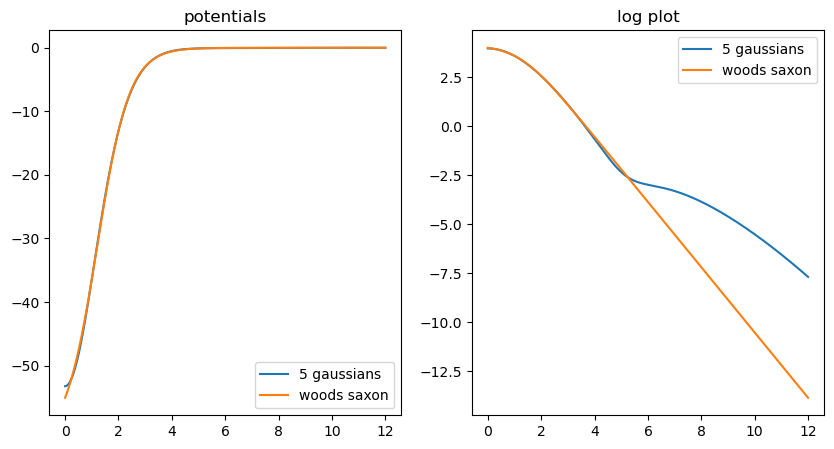

In [8]:
fig = plt.figure(figsize = (10,5))
V0 = np.abs(-11.39 * (-1)**ORB_ANG_MOMENTUM - 51.13)

spec = fig.add_gridspec(ncols=2, nrows=1)
ax_1 = fig.add_subplot(spec[0, 0])
ax_2 = fig.add_subplot(spec[0, 1])

gaussian_potentials = five_gaussian_potential(r_values, c[0], betas[0], c[1], betas[1], c[2], betas[2], c[3], betas[3], c[4], betas[4])

ax_1.plot(r_values, gaussian_potentials, label = '5 gaussians')
ax_1.plot(r_values, finding_full_woods_saxon_potential(r_values), label = 'woods saxon')
ax_1.legend()
ax_1.set_title('potentials')

#gaussian_potentials = (1 / 63) *five_gaussian_potential(r_values, c[0], betas[0], c[1], betas[1], c[2], betas[2], c[3], betas[3], c[4], betas[4])

ax_2.plot(r_values, np.log(np.abs(gaussian_potentials)), label = '5 gaussians')
ax_2.plot(r_values, np.log(np.abs(finding_full_woods_saxon_potential(r_values))), label = 'woods saxon')
ax_2.set_title('log plot')

# division = gaussian_potentials / finding_full_woods_saxon_potential(r_values)
# print(division[0:50])

plt.legend()
plt.show()